# 오일러 공식(Euler's formula)

[오일러 공식](https://ko.wikipedia.org/wiki/%EC%98%A4%EC%9D%BC%EB%9F%AC_%EA%B3%B5%EC%8B%9D)은 복소지수함수를 삼각함수로 변환할 수 있도록 한다

$e^{j\theta} = \cos{\theta} + j\sin{\theta}$

![Euler](https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Euler%27s_formula.svg/540px-Euler%27s_formula.svg.png)

따라서 $e^{j2\pi Ft} = \cos{2\pi ft + j\sin{2\pi ft}}$식은 주파수$f$인 정현파(sinusoidal wave)의 복소지수함수 표현이 된다

# Hilbert Transform

힐버트 변환은 신호의 amplitude는 유지하되 phase만 $\frac{-\pi}{2}$만큼(음의 주파수의 경우에는 $\frac{\pi}{2}$만큼 phase를 shift해준다) shift해주는 선형필터이다

> $\sin{(2\pi ft)} = \cos{(2\pi ft - \frac{\pi}{2})}$

예를들어 $x(t) = \cos{2\pi ft}$함수일 때 phase만 $\frac{-\pi}{2}$만큼 shift하게 되면 오일러 공식에서 허수부의 신호를 구할 수 있게 된다. 힐버트 변환이란 이런 허수부의 신호를 얻기 위한 변환이라고 보면 된다.

In [4]:
from scipy.signal import hilbert, chirp

Result of Hilbert Transform : 

[ 1.        -0.29786271j  0.97295768+0.12613297j  0.84319119+0.53077936j
  0.61685866+0.78562781j  0.31165687+1.00564738j -0.04395215+1.06441205j
 -0.41296169+1.03863128j -0.75341365+0.85137483j -1.02308934+0.58232898j
 -1.18482474+0.20063937j]


differential Angle of signal : 

-0.29
0.13
0.56
0.91
1.27
1.61

all result of Hilbert Transform apply angle

[-0.28949483  0.12891969  0.56182066  0.90515799  1.27027577  1.6120653
  1.9492336   2.2952271   2.6241381   2.97384309]

Real signal

[ 1.          0.97295768  0.84319119  0.61685866  0.31165687 -0.04395215
 -0.41296169 -0.75341365 -1.02308934 -1.18482474]


Imagenary signal

[-0.29786271  0.12613297  0.53077936  0.78562781  1.00564738  1.06441205
  1.03863128  0.85137483  0.58232898  0.20063937]


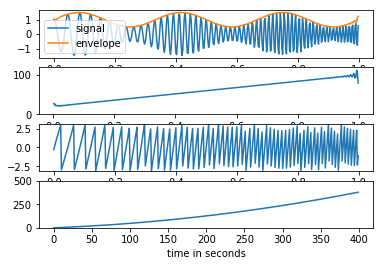

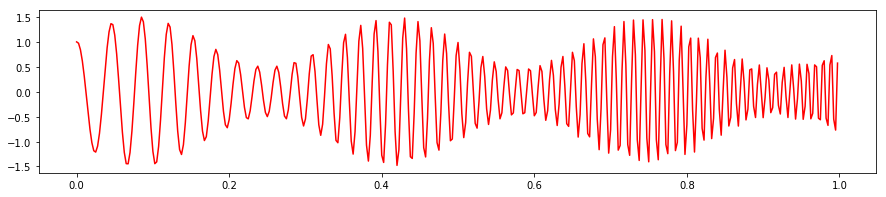

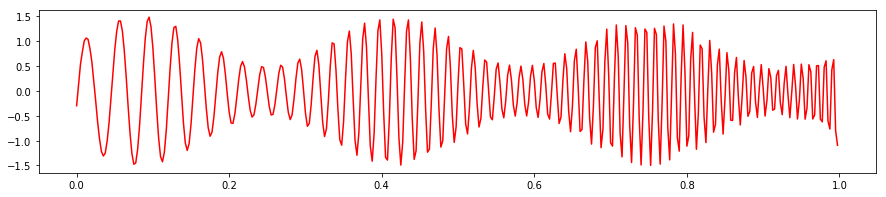

In [76]:
duration = 1.0
fs = 400
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = chirp(t , 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0 * np.pi * 3.0 * t))

analytic_signal = hilbert(signal)

print("Result of Hilbert Transform : \n\n{}".format(analytic_signal[0:10]), end="\n\n")
print("\ndifferential Angle of signal : \n")
print("{value:.2f}".format(value=np.angle(analytic_signal[0])))
print("{value:.2f}".format(value=np.angle(analytic_signal[1])))
print("{value:.2f}".format(value=np.angle(analytic_signal[2])))
print("{value:.2f}".format(value=np.angle(analytic_signal[3])))
print("{value:.2f}".format(value=np.angle(analytic_signal[4])))
print("{value:.2f}".format(value=np.angle(analytic_signal[5])))
print("\nall result of Hilbert Transform apply angle\n")
print(np.angle(analytic_signal)[0:10], end="\n\n")

print("Real signal\n")
print(analytic_signal.real[0:10], end="\n\n\n")
print("Imagenary signal\n")
print(analytic_signal.imag[0:10])

amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)

fig = plt.figure()
ax0 = fig.add_subplot(411)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(412)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

ax2 = fig.add_subplot(413)
ax2.plot(t, np.angle(analytic_signal))
ax2.set_xlabel("time in seconds")
ax2.set_ylim(-np.pi, np.pi)

ax3 = fig.add_subplot(414)
ax3.plot(instantaneous_phase)
ax3.set_xlabel("time in seconds")
ax3.set_ylim(0.0, 500)

plt.figure(figsize=(15,3))
plt.plot(t, analytic_signal.real, 'r')
plt.show()

plt.figure(figsize=(15,3))
plt.plot(t, analytic_signal.imag, 'r')
plt.show()

Result of Hilbert Transform : 

[1.        +9.93802508e-16j 0.99802673+6.27905195e-02j
 0.9921147 +1.25333234e-01j ... 0.98228725-1.87381315e-01j
 0.9921147 -1.25333234e-01j 0.99802673-6.27905195e-02j]


differential Angle of signal : 

0.00
0.06
0.13
0.19
0.25
0.31

all result of Hilbert Transform apply angle

[ 9.93802508e-16  6.28318531e-02  1.25663706e-01 ... -1.88495559e-01
 -1.25663706e-01 -6.28318531e-02]

Real signal

[1.         0.99802673 0.9921147  0.98228725 0.96858316 0.95105652
 0.92977649 0.90482705 0.87630668 0.84432793]


Imagenary signal

[9.93802508e-16 6.27905195e-02 1.25333234e-01 1.87381315e-01
 2.48689887e-01 3.09016994e-01 3.68124553e-01 4.25779292e-01
 4.81753674e-01 5.35826795e-01]


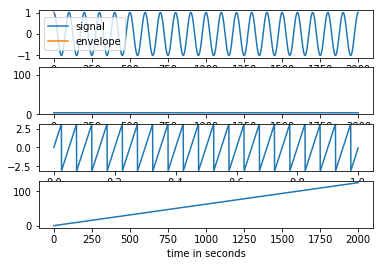

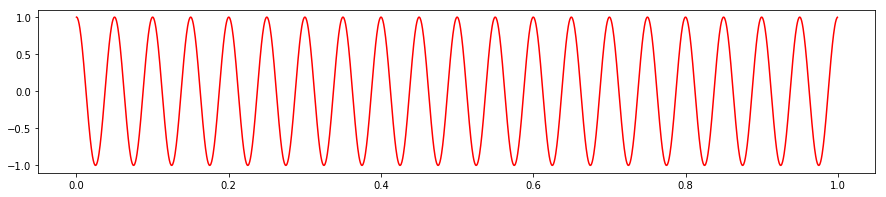

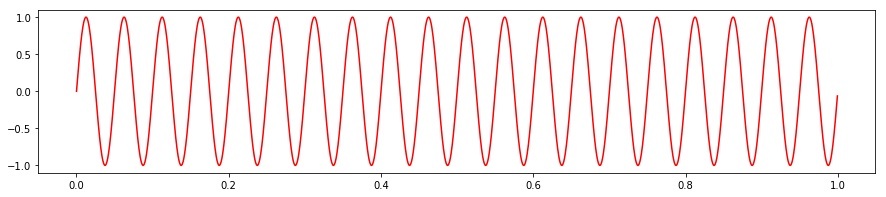

In [77]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 1                      # End of time
t = np.arange(0, te, T)      # Time vector
Freq = 20
omega = 2 * np.pi * Freq
theta = 0

cos_signal = 1. * np.cos((omega * t) + theta)

analytic_signal = hilbert(cos_signal)

print("Result of Hilbert Transform : \n\n{}".format(analytic_signal), end="\n\n")
print("\ndifferential Angle of signal : \n")
print("{value:.2f}".format(value=np.angle(analytic_signal[0])))
print("{value:.2f}".format(value=np.angle(analytic_signal[1])))
print("{value:.2f}".format(value=np.angle(analytic_signal[2])))
print("{value:.2f}".format(value=np.angle(analytic_signal[3])))
print("{value:.2f}".format(value=np.angle(analytic_signal[4])))
print("{value:.2f}".format(value=np.angle(analytic_signal[5])))
print("\nall result of Hilbert Transform apply angle\n")
print(np.angle(analytic_signal), end="\n\n")

print("Real signal\n")
print(analytic_signal.real[0:10], end="\n\n\n")
print("Imagenary signal\n")
print(analytic_signal.imag[0:10])

amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)

fig = plt.figure()
ax0 = fig.add_subplot(411)
ax0.plot(cos_signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(412)
ax1.plot(instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0, 120)

ax2 = fig.add_subplot(413)
ax2.plot(t, np.angle(analytic_signal))
ax2.set_xlabel("time in seconds")
ax2.set_ylim(-np.pi, np.pi)

ax3 = fig.add_subplot(414)
ax3.plot(instantaneous_phase)
ax3.set_xlabel("time in seconds")

plt.figure(figsize=(15,3))
plt.plot(t, analytic_signal.real, 'r')
plt.show()

plt.figure(figsize=(15,3))
plt.plot(t, analytic_signal.imag, 'r')
plt.show()

### REFERENCE

[1.The Hilbert transform](https://www.youtube.com/watch?v=VyLU8hlhI-I)  
[2.Instantaneous frequency (frequency sliding)](https://www.youtube.com/watch?v=fqkLgJ0Czoc)  
[3. Fourier Series visualization (+source)](https://www.youtube.com/watch?v=WSkczQe6YxA)  
[4. But what is the Fourier Transform? A visual introduction](https://www.youtube.com/watch?v=spUNpyF58BY&t=550s)  
[5.Analytic signal, Hilbert Transform and FFT](https://www.gaussianwaves.com/2017/04/analytic-signal-hilbert-transform-and-fft/)

# Myo를 이용해서 Phase Synchronization feature 구현해보기

In [ ]:
# emg file directory & path

emg_rock_short_path = "./myo/myo_emg_data(short_frequently_lock).txt"
emg_rock_long_path = "./myo/myo_emg_data(long, Rock).txt"
emg_nothing = "./myo/myo_emg_data(nothing).txt"

In [ ]:
# load Strongly Short Power emg data

sensor_channels = 8
short_emgs = [list() for i in range(sensor_channels)]

with open(emg_rock_short_path) as f:
    while(1):                
        line = f.readline().rstrip()
        line = line.replace(" ", "")
        if (line is None or line == ""):
            break
        
        #print(line)        
        _emgs = line.split("\t")                
        
        for i in range(sensor_channels):
            short_emgs[i].append(int(_emgs[i]))
            

In [ ]:
fig = plt.figure(figsize=(10,12))
fig.suptitle("Gesture: Rock, Strongly Short Power", fontsize=20)

for i in range(sensor_channels):
    arg = "81" + str(i)
    plt.subplot(arg)
    plt.plot(short_emgs[i])
    plt.grid()
    plt.ylim([-128, 127])


plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 3))
fig.suptitle("Gesture: Rock, Strongly Short Power", fontsize=20)

plt.plot(short_emgs[i])
plt.grid()
plt.ylim([-128, 127])

plt.show()

In [ ]:
signal = short_emgs[i]



Fs = 200.
NFFT = len(signal)
k = np.arange(NFFT)
f0 = k*Fs/NFFT
f0 = f0[range(math.trunc(NFFT/2))]

Y=np.fft.fft(signal)/NFFT               # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Signal", fontsize=20)

plt.subplot(311)
plt.plot(short_emgs[i])
plt.grid()
plt.ylim([-128, 127])
plt.xlabel("time")
plt.ylabel("y")

plt.subplot(312)
plt.plot(f0, amplitude_Hz, 'r')
plt.xlabel("frequency($Hz$)")
plt.ylabel("amplitude")

plt.subplot(313)
plt.plot(f0, phase_ang)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.ylim( -180, 180)

plt.show()

# Shifted
shifted_signal = shift_signal_in_frequency_domain(signal, 20)

Y=np.fft.fft(shifted_signal)/NFFT               # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Shifted Signal", fontsize=20)

plt.subplot(311)
plt.plot(shifted_signal)
plt.grid()
plt.ylim([-128, 127])
plt.xlabel("time")
plt.ylabel("y")

plt.subplot(312)
plt.plot(f0, amplitude_Hz, 'r')
plt.xlabel("frequency($Hz$)")
plt.ylabel("amplitude")

plt.subplot(313)
plt.plot(f0, phase_ang)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.ylim( -180, 180)

plt.show()




In [ ]:
class SlideWindows:
    def __init__(self, size : int, overlap : float):
        self.size = size
        self.step = round(size * overlap)
        
    def __call__(self, data):
        
        # data should be 1-d numpy.ndarray
        result = list()
        start_idx = 0        
        i = 0
        
        while((len(data) - start_idx) > 0):                                            
            start_idx = start_idx + (i * self.step)
            end_idx = start_idx + self.size                    
            
            if (len(data) - start_idx) < self.size:                
                tmp = data[start_idx:].squeeze().tolist()
                length = self.size - len(tmp)
                
                for i in range(length):
                    tmp.append(0)
                                            
                ex_list = list(set(tmp))
                
                if (len(ex_list) > 1) and (tmp != []):                    
                    tmp = np.asarray(tmp)
                    result.append(tmp)
                else:
                    result = np.asarray(result).squeeze()            
                    return result                    
            
            if data[start_idx:end_idx].size == self.size :                
                result.append(data[start_idx:end_idx])
            
            i += 1
            
        

In [ ]:
def nextpow2(i):
    '''
    Find the next power 2 number for FFT
    '''
    
    n = 1
    while n < i: n *= 2
    return n

def shift_signal_in_frequency_domain(datin, shift):
    '''
    This is function to shift a signal in frequency domain. 
    The idea is in the frequency domain, 
    we just multiply the signal with the phase shift. 
    '''
    Nin = len(datin) 
    
    # get the next power 2 number for fft
    N = nextpow2(Nin +np.max(np.abs(shift)))
    
    # do the fft
    fdatin = np.fft.fft(datin, N)
    
    # get the phase shift for the signal, shift here is D in the above explaination
    ik = np.array([2j*np.pi*k for k in range(0, N)]) / N 
    fshift = np.exp(-ik*shift)
        
    # multiple the signal with the shift and transform it back to time domain
    datout = np.real(np.fft.ifft(fshift * fdatin))
    
    # only get the data have the same length as the input signal
    datout = datout[0:Nin]
    
    return datout